In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
print("[INFO] accessing MNIST...")
(x_train, y_train), (x_test, y_test) = mnist.load_data()

[INFO] accessing MNIST...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train.reshape((x_train.shape[0], -1)).astype('float32') / 255
x_test  = x_test.reshape((x_test.shape[0], -1)).astype('float32') / 255

In [4]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test  = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
H = model.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6159 - loss: 1.2610 - val_accuracy: 0.9068 - val_loss: 0.3259
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9074 - loss: 0.3127 - val_accuracy: 0.9286 - val_loss: 0.2531
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9283 - loss: 0.2465 - val_accuracy: 0.9389 - val_loss: 0.2116
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9418 - loss: 0.2013 - val_accuracy: 0.9473 - val_loss: 0.1776
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9492 - loss: 0.1747 - val_accuracy: 0.9525 - val_loss: 0.1609
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9571 - loss: 0.1498 - val_accuracy: 0.9575 - val_loss: 0.1473
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9601 - loss: 0.1357 - val_accuracy: 0.9611 - val_loss: 0.1321
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9636 - loss: 0.1211 - 

In [8]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9670 - loss: 0.1077
Test accuracy: 97.06%


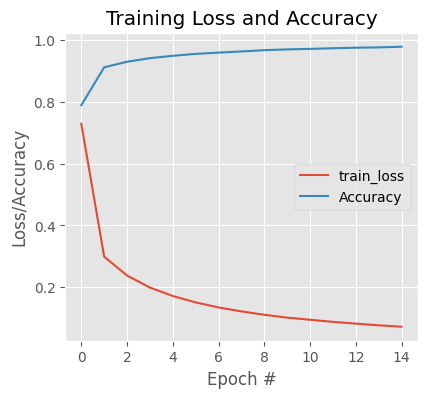

In [9]:
plt.style.use("ggplot")
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(H.history['loss'], label="train_loss")
plt.plot(H.history['accuracy'], label="Accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()